# Mislabeled Exemples in Regression with the Housing dataset


In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import fetch_california_housing
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RepeatedKFold

from mislabeled.aggregate import mean, oob
from mislabeled.detect import ModelProbingDetector
from mislabeled.ensemble import IndependentEnsemble


In [4]:
dataset = fetch_california_housing()
X, y = dataset.data, dataset.target
feature_names = dataset.feature_names

In [5]:
detect = ModelProbingDetector(
    base_model=RandomForestRegressor(),
    ensemble=IndependentEnsemble(
        RepeatedKFold(
            n_splits=5,
            n_repeats=10,
        ),
        n_jobs=-1,
    ),
    probe="l2",
    aggregate=oob(mean),
)
trust = detect.trust_score(X, y)

(array([2.0000e+00, 3.0000e+00, 1.3000e+01, 1.4000e+01, 1.4000e+01,
        4.6000e+01, 6.0000e+01, 1.7600e+02, 5.1400e+02, 1.9798e+04]),
 array([-1.34224544e+01, -1.20802090e+01, -1.07379635e+01, -9.39571810e+00,
        -8.05347266e+00, -6.71122721e+00, -5.36898177e+00, -4.02673633e+00,
        -2.68449089e+00, -1.34224544e+00, -1.17540275e-28]),
 <BarContainer object of 10 artists>)

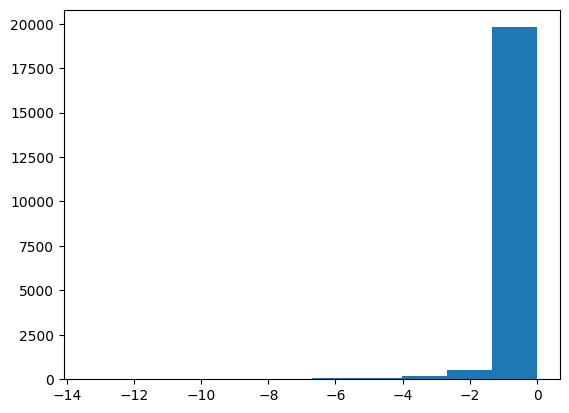

In [6]:
indices = np.argsort(trust)
plt.hist(trust)

/var/folders/65/rv76bdzx3sv0m6rwzx__cds40000gn/T/ipykernel_36804/2883180015.py:37: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "bo" (-> color='b'). The keyword argument will take precedence.
  c = plt.plot(


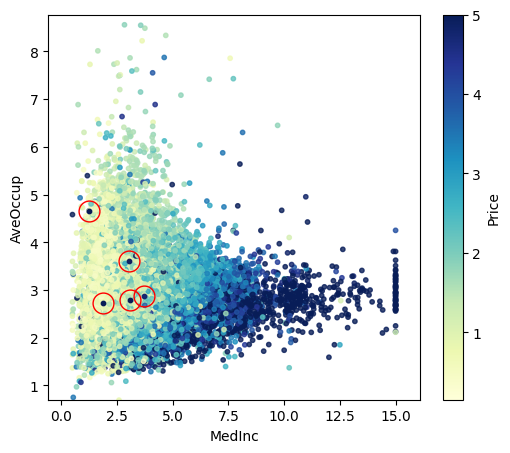

In [7]:
def lims(d, eps=0.25):
    min_lim = np.percentile(d, eps)
    max_lim = np.percentile(d, 100 - eps)

    return min_lim - 0.1 * (max_lim - min_lim), max_lim + 0.1 * (max_lim - min_lim)


plt.figure(figsize=(6, 5))
cmap = plt.get_cmap("YlGnBu")

i1 = 0
i2 = 5

imax = X.shape[0]
plt.scatter(
    X[:imax, i1],
    X[:imax, i2],
    c=y[:imax],
    alpha=0.8,
    vmin=y.min(),
    vmax=y.max(),
    cmap="YlGnBu",
    s=10,
)

for i in range(6):
    ind = indices[i]
    scat = plt.scatter(
        X[ind, i1],
        X[ind, i2],
        c=y[ind],
        vmin=y.min(),
        vmax=y.max(),
        cmap="YlGnBu",
        s=10,
    )
    c = plt.plot(
        X[ind, i1], X[ind, i2], "bo", markersize=15, fillstyle="none", color="red"
    )

eps = 0.25
plt.xlim(*lims(X[:, i1]))
plt.ylim(*lims(X[:, i2]))

plt.xlabel(feature_names[i1])
plt.ylabel(feature_names[i2])
plt.colorbar(scat, label="Price")
plt.show()